In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn')

C:\Users\tiago\AppData\Local\Temp/ipykernel_21716/2439460743.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
routes_cols = {
    'route_long_name': str,
    'route_short_name': str,
    'agency_id': np.int64,
    'route_type': np.int64,
    'route_id': np.int64
}
routes = pd.read_csv('original/routes.txt', dtype=routes_cols)

In [3]:
trips_cols = {
    'route_id': np.int64,
    'service_id': np.int64,
    'direction_id': np.int64,
    'trip_id': np.int64
}
trips = pd.read_csv('original/trips.txt', dtype=trips_cols)

In [4]:
agency_cols = {
    'agency_id': np.int64,
    'agency_name': str,
    'agency_url': str,
    'agency_timezone': str,
    'agency_lang': str
}
agency = pd.read_csv('original/agency.txt', dtype=agency_cols)

In [5]:
stops_cols = {
    'stop_name': str,
    'stop_id': np.int64,
    'stop_lat': np.float64,
    'stop_lon': np.float64
}
stops = pd.read_csv('original/stops.txt', dtype=stops_cols)

In [6]:
stop_times_cols = {
    'trip_id': np.int64,
    'arrival_time': str,
    'departure_time': str,
    'stop_id': np.int64,
    'stop_sequence': np.int64,
    'pickup_type': np.float64,
    'drop_off_type': np.float64
}
stop_times = pd.read_csv('original/stop_times.txt', dtype=stop_times_cols)

In [7]:
agency[agency['agency_id'] == 73]

,agency_id,agency_name,agency_url,agency_timezone,agency_lang
86,73,DB Regio AG Bayern,https://www.bahn.de,Europe/Berlin,de


In [8]:
routes_sbahn = routes.loc[
    (routes['agency_id'] == 73) &
    (routes['route_long_name'].str.startswith('S')) &
    ~(routes['route_long_name'].str.fullmatch('S60'))
]
del routes
routes_sbahn

,route_long_name,route_short_name,agency_id,route_type,route_id
773,S1,S1,73,2,134
794,S2,S2,73,2,94
797,S20,S20,73,2,773
811,S3,S3,73,2,135
825,S4,S4,73,2,132
845,S5,S5,73,2,553
858,S6,S6,73,2,34
871,S7,S7,73,2,105
880,S8,S8,73,2,11


In [9]:
trips_sbahn = pd.merge(routes_sbahn.loc[:, 'route_id'], trips, on='route_id', how='inner')
del trips
trips_sbahn

,route_id,service_id,direction_id,trip_id
0,134,100,0,10678
1,134,100,0,11996
2,134,100,0,12411
3,134,100,0,12826
4,134,100,0,13608
...,...,...,...,...
4352,11,98,0,35196
4353,11,98,0,35862
4354,11,98,0,42906
4355,11,98,0,67467


In [10]:
stop_times_sbahn = pd.merge(trips_sbahn.loc[:, 'trip_id'], stop_times, on='trip_id', how='inner')
del stop_times
stop_times_sbahn

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type
0,10678,16:51:00,16:51:00,972,0,NaN,NaN
1,10678,16:52:00,16:53:00,13903,1,NaN,NaN
2,10678,16:59:00,17:04:00,9080,2,NaN,NaN
3,10678,17:07:00,17:07:00,1576,3,NaN,NaN
4,10678,17:10:00,17:10:00,3263,4,NaN,NaN
...,...,...,...,...,...,...,...
79238,70929,22:16:00,22:17:00,13692,18,NaN,NaN
79239,70929,22:18:00,22:19:00,13337,19,NaN,NaN
79240,70929,22:20:00,22:20:00,5508,20,NaN,NaN
79241,70929,22:22:00,22:22:00,8257,21,NaN,NaN


In [11]:
stops_sbahn = pd.merge(stop_times_sbahn.loc[:, 'stop_id'].drop_duplicates(), stops, on='stop_id', how='inner')
del stops
stops_sbahn

,stop_id,stop_name,stop_lat,stop_lon
0,972,München Flughafen Terminal,48.353840,11.786310
1,13903,München Flughafen Besucherpark,48.352177,11.764157
2,9080,Neufahrn(b Freising),48.321840,11.661408
3,1576,Eching,48.302876,11.616555
4,3263,Lohhof,48.288300,11.581206
...,...,...,...,...
659,7152,Herrsching,47.998577,11.170479
660,10002,Unterföhring,48.190310,11.646772
661,2374,Weßling(Oberbay),48.077374,11.251768
662,2563,München-Daglfing,48.149624,11.649330


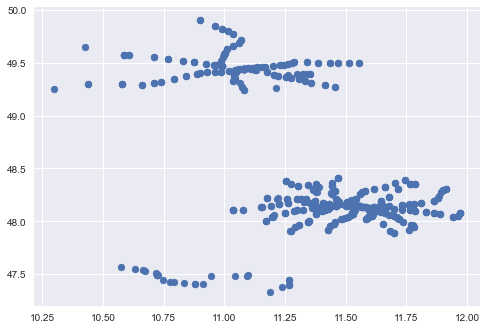

In [26]:
plt.scatter(stops_sbahn['stop_lon'], stops_sbahn['stop_lat'])

## Remove trips/routes outside of Munich

The dataset contains routes in Nurnbern and Austria, which we want to filter out

In [27]:
stops_sbahn.drop(stops_sbahn.loc[(stops_sbahn['stop_lat'] < 47.8) | (stops_sbahn['stop_lat'] > 49)].index, inplace=True)

Now to propagate throughout the other dataframes...  
We only wish to keep trips that are exclusively in Munich

In [ ]:
# df = stop_times_sbahn.merge(stops_sbahn, on='stop_id', how='inner') \
#     .merge(trips_sbahn, on='trip_id', how='inner')
# trips_to_keep = df[['trip_id']].drop_duplicates()

# trips_sbahn = pd.merge(trips_sbahn, trips_to_keep, on='trip_id', how='inner')

# del df
# del trips_to_keep

# Cluster stops

The dataset has multiple entries per station, which is prejudicial for the OMNeT++ configurations.

In [28]:
stops_sbahn[stops_sbahn['stop_name'].str.contains('Laim')]
# stops_sbahn[:]['stop_name'].unique()

,stop_id,stop_name,stop_lat,stop_lon
10,9374,Laim,48.143414,11.502424
21,5911,Laim,48.144370,11.503669
31,4360,Laim,48.143410,11.502101
154,10048,Berg am Laim,48.134056,11.633165
181,8500,Berg am Laim,48.133960,11.633138
225,13539,Berg am Laim,48.134003,11.633295
333,7762,Laim,48.144287,11.503448


Some station names are weird, so we'll do a first pass and the manually set some names

In [29]:
# stops_sbahn['stop_name'] = stops_sbahn.loc[:, 'stop_name'].str.removeprefix('München').str.strip(' -')
stops_sbahn['stop_name'] = stops_sbahn.loc[:, 'stop_name']\
    .str.removeprefix('München')\
    .str.removesuffix('(Oberbay)')\
    .str.strip(' -')

In [39]:
# Manual overrides of odd station names
stops_sbahn.loc[stops_sbahn['stop_name'] == 'Ost', 'stop_name'] = 'Ostbahnhof'
stops_sbahn.loc[stops_sbahn['stop_name'] == 'Hbf Gl.27-36', 'stop_name'] = 'Hbf'
stops_sbahn.loc[stops_sbahn['stop_name'] == 'Hbf (tief)', 'stop_name'] = 'Hbf'
stops_sbahn.loc[stops_sbahn['stop_name'] == 'Schwabhausen(b Dachau)', 'stop_name'] = 'Schwabhausen'
stops_sbahn.loc[stops_sbahn['stop_name'] == 'Altomünster, Bahnhof', 'stop_name'] = 'Altomünster'

In [40]:
CLUSTER_RANGE = 0.005

class Cluster:
    def __init__(self) -> None:
        self.name = None
        self.id = -1
        self.lon = 0
        self.lat = 0
        self.stop_ids = set()
    
    def belongs(self, row: pd.Series):
        return abs(self.lon - row['stop_lon']) <= CLUSTER_RANGE \
            and abs(self.lat - row['stop_lat']) <= CLUSTER_RANGE

    def add(self, index: int, row: pd.Series) -> None:
        n_members = len(self.stop_ids)

        self.lon = ((self.lon * n_members) + row['stop_lon']) / (n_members + 1)
        self.lat = ((self.lat * n_members) + row['stop_lat']) / (n_members + 1)

        name = row['stop_name']
        if self.name == None:
            self.id = index
            self.name = name
        elif self.name != name:
            print(f'Conflicting stop names "{name}" [{index}]  and "{self.name}" [{self.id}]')

        self.stop_ids.add(index)
    
    def get_dict(self) -> dict:
        d = { self.id: self.id }
        for stop in self.stop_ids:
            d[stop] = self.id
        return d

In [47]:
st = stops_sbahn.set_index('stop_id')

clusters = []
for index, row in st.iterrows():

    cluster = None
    # Try to find match in existing cluster    
    for c in clusters:
        if (c.belongs(row)):
            if (cluster == None):
                cluster = c
            else:
                print(f'"{row["stop_name"]}" Could fit multiple clusters: "{c.name}" and "{cluster.name}"')
    
    # If no cluster found, create another
    if cluster == None:
        cluster = Cluster()
        clusters.append(cluster)
    
    cluster.add(index, row)

# Create map of old -> new keys
# Build new dataframe from clusters
stop_update_map = dict()
data = []
for c in clusters:
    stop_update_map.update(c.get_dict())
    data.append((c.id, c.name, c.lon, c.lat))
stops_sbahn = pd.DataFrame(data=data, columns=['stop_id', 'stop_name', 'stop_lon', 'stop_lat'])

del st

print(f'Clustering resulted in {len(stops_sbahn.index)} stops')

Clustering resulted in 150 stops


## Resulting München map

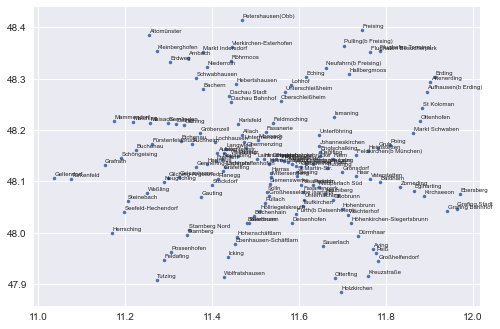

In [50]:
plt.plot(stops_sbahn['stop_lon'], stops_sbahn['stop_lat'], ls='', marker='.')

for _, row in stops_sbahn.iterrows():
    x = row['stop_lon']
    y = row['stop_lat']
    plt.text(x * (1 + 0.0001), y * (1 + 0.0001) , row['stop_name'], fontsize=6)

### Propagate the new clusters to the stop_times dataframe

In [42]:
for old, new in stop_update_map.items():
    if old != new:
        stop_times_sbahn.loc[stop_times_sbahn['stop_id'] == old, 'stop_id'] = new
del stop_update_map